# Kaggle's Digit Recognizer  

## Solving Kaggle's Beginner Competition  [Digit Recognizer](https://www.kaggle.com/competitions/digit-recognizer/)  

#### A Deep Dive into CNN Architectures  

**By:** Devesh Kumar Suthar  
**Date:** 30th Aug 2025  


## Project Description
> This notebook presents a comprehensive, step-by-step solution to the Kaggle "Digit Recognizer" competition. The goal is to correctly identify handwritten digits from the famous MNIST dataset, a classic benchmark in the field of computer vision.

> My approach follows a structured methodology, beginning with a thorough Exploratory Data Analysis (EDA) to understand the dataset's characteristics. I then establish a performance baseline by implementing the foundational LeNet-5 architecture, a pioneering model in deep learning.

## Project Plan & Strategy
> #### Phase 1: Foundation & Exploration:
>>  We will begin by setting up the environment, loading the data, and performing a detailed Exploratory Data Analysis (EDA). This phase is crucial for understanding the data's structure, visualizing the digits, and preparing the data for our models.
> #### Phase 2: Data Preprocessing:
>> transform our raw data into a clean, structured format that is perfectly suited for training a Convolutional Neural Network (CNN). This involves five key steps: separating features and labels, normalizing pixel values, reshaping the data into image tensors,  and splitting the data into training and validation sets.
> #### Phase 3: Baseline Modeling (LeNet-5):
>> To appreciate modern advancements, we must first understand the classics. We will build and train the LeNet-5 architecture, evaluate its performance, and analyze its strengths and weaknesses. This will serve as our initial performance benchmark.
> #### Phase 4: Advanced Modeling (VGG-style CNN):
>> In this core phase, we will design and implement a more sophisticated CNN inspired by the VGGNet paper. The goal is to significantly outperform our baseline model by leveraging deeper architecture and modern regularization techniques.
> #### Phase 5: Evaluation & Submission:
>> With a trained model, we will perform a final evaluation, make predictions on the unseen test dataset, and format the results into the required CSV format for submission to the Kaggle competition.
> #### Phase 6: Conclusion & Future Work:
>> Finally, we will summarize the project's findings, compare the performance of the different models, and discuss potential next steps and improvements, such as data augmentation or experimenting with even more advanced architectures like ResNet blocks.


# So Let's Get Started

## [](http://)Phase 1:
> ### Foundation & Exploration: 

#### Importing Libraries

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the digit data

In [6]:
train_dataset_path = '/kaggle/input/digit28x28matrices/train.csv'
train_df = pd.read_csv(train_dataset_path)
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Initial Data Analysis
> #### Structure: 
>> The first column, named label, is our target variable. It contains the actual digit (from 0 to 9) that the image represents.
>> 
>> The remaining 784 columns (pixel0 to pixel783) constitute our feature set. Each column represents a single pixel's intensity value, from 0 (black) to 255 (white).
>>
>> These 784 pixels form a 28x28 grid. For our Convolutional Neural Network (CNN)
>>
>> We  will be to reshape this 1D vector back into a 2D image tensor of shape (28, 28, 1).

In [7]:
total_missing_values = train_df.isnull().sum().sum()
print("Missing values:",total_missing_values)

Missing values: 0


In [8]:
 train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


### The dataset contains 
> #### 42,000 images across 785 integer columns.
> #### It is perfectly clean with no missing values.

### Checking the Class Distribution:
> #### We need to see if the number of images for each digit (0-9) is roughly the same. An imbalanced dataset can bias a model.

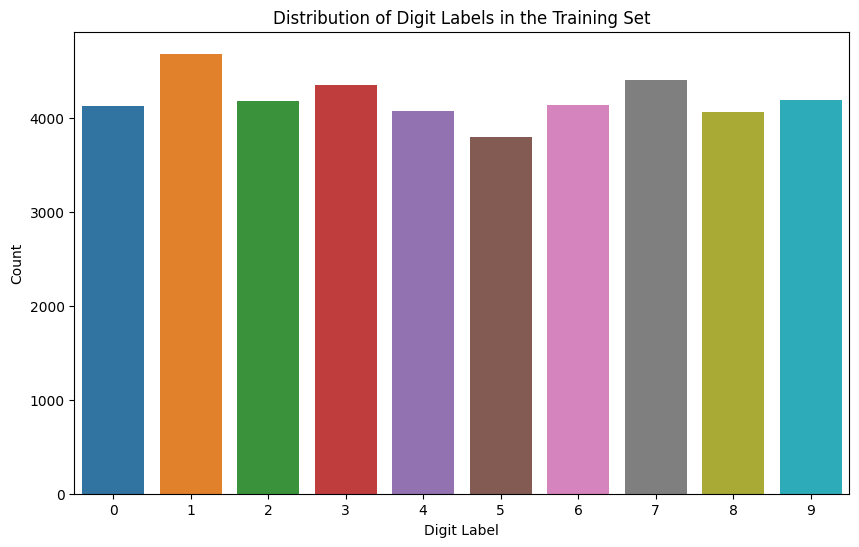

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=train_df)
plt.title('Distribution of Digit Labels in the Training Set')
plt.xlabel('Digit Label')
plt.ylabel('Count')
plt.show()

> #### The classes are slightly imbalanced but still well-distributed. There are no severely underrepresented digits, meaning the model will have sufficient examples for each class to learn from.

### Visualize the Digits :
> ####  Ensuring the data actually looks like handwritten digits and to get a feel for the variations in handwriting.
> #### Plotting the first 10 images of the Dataset.

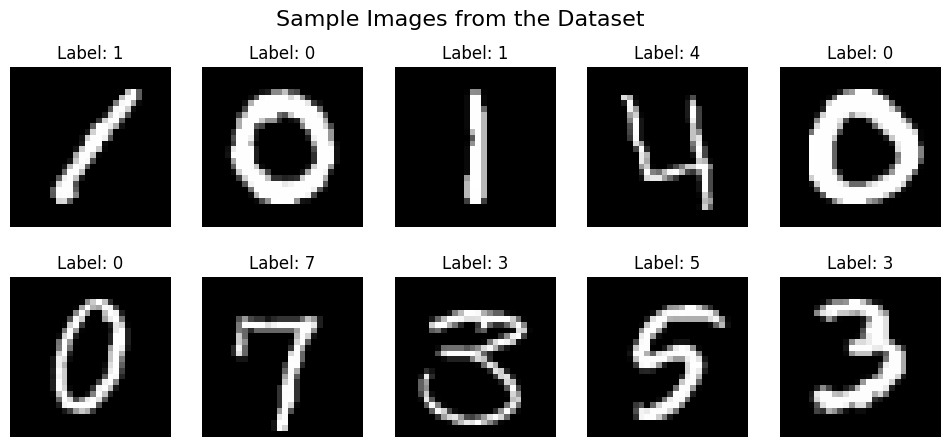

In [10]:
labels = train_df['label']
pixels = train_df.drop('label', axis=1)

plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    # Reshape the 784 pixels into a 28x28 numpy array
    image = pixels.iloc[i].to_numpy().reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {labels.iloc[i]}')
    plt.axis('off') # Hide the axes
plt.suptitle('Sample Images from the Dataset', fontsize=16)
plt.show()

> #### visual check confirms the data consists of handwritten digits with a variety of writing styles, which is exactly what we expect. This visual diversity is what makes the problem interesting and requires a robust model like a CNN.

### Final EDA Summary:  
> #### Dataset: 42,000 clean, complete training images.
> #### Structure: Each image is a 28x28 (784) pixel grid.
> #### Content: The images are visually confirmed to be handwritten digits.
> #### Balance: The classes are slightly imbalanced but well within an acceptable range for a standard modeling approach.

## Phase 2:
> ### Data Preprocessing
> ### Preprocessing Your Data 
>> 1. Separate Features (X) and Labels (y).
>> 2. Normalize pixels to a [0, 1] scale.
>> 3. Reshape the features into (28, 28, 1) tensors.
>> 4. One Hot Encoding of Labels.
>> 5. Split the data into training and validation sets.

#### Importing Libraries

In [11]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#### 1. Separate Features (X) and Labels (y) 

In [12]:
X = train_df.drop('label', axis=1)
y = train_df['label']

#### 2. Normalization

In [13]:
X = X / 255.0

#### 3. Reshaping

In [14]:
X = X.values.reshape(-1, 28, 28, 1)

#### 4. One-Hot Encoding 

In [15]:
y = to_categorical(y, num_classes=10)

#### 5. Data Splitting 

In [16]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.1,
    random_state=42,
    stratify=y
)

In [17]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")


Shape of X_train: (37800, 28, 28, 1)
Shape of y_train: (37800, 10)
Shape of X_val: (4200, 28, 28, 1)
Shape of y_val: (4200, 10)


### Preparing Competition Train Set 
> 1. Load the official competition test data
> 2. Preprocess the data

In [29]:
competition_test_df = pd.read_csv('/kaggle/input/data-classifieer-train-submission/test.csv')

competition_test_images = competition_test_df / 255.0
competition_test_images = competition_test_images.values.reshape(-1, 28, 28, 1)


### Preprocessing Summary
> #### Our data is now fully prepared. We have normalized, reshaped, and one-hot encoded our features and labels. By creating separate training and validation sets, we have established a robust framework to train our model and evaluate its ability to generalize to unseen data. We are now ready to proceed to *Phase 3: Baseline Modeling*.

## A Note on Methodology: Oversampling and Augmentation
#### Before building our first model, it's important to address two common techniques: 
> #### oversampling and data augmentation. For this initial baseline phase, we have strategically chosen not to implement either.

### Why Not Oversampling?
### Ans :
> #### Oversampling is a technique used to correct for severe class imbalance (e.g., when one class has 100 times more samples than another). Our analysis showed that the MNIST dataset has only a minor imbalance; every digit is represented by thousands of high-quality images. This is more than sufficient for a model to learn effectively, making oversampling unnecessary for this problem.

### Why Not Data Augmentation (For Now)?
### Ans :
> #### Data augmentation (creating new data by rotating, shifting, or cropping existing images) is a powerful tool for improving a model's generalization and reducing overfitting. However, our immediate goal is to establish a baseline performance with a simple model on the original, unaltered data.
> #### By training on the standard dataset first, we can get a clear benchmark. We will introduce data augmentation later, in the advanced modeling phase, as a specific strategy to improve upon this baseline score. This step-by-step approach allows us to accurately measure the impact of each technique we apply.

## Phase 3: 
> ### Baseline Modeling (LeNet-5)

>> ##### Now that our data is preprocessed, we can build our first model. To establish a performance baseline, we will implement a modern version of the LeNet-5 architecture. Created by Yann LeCun in 1998, LeNet-5 was a pioneering model that set the foundation for modern Convolutional Neural Networks.

#### Importing libraries

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#### 1. Define the LeNet-5 Inspired Architecture

In [19]:
model = Sequential([
    # Conv2D: Learns features from the image.
    # 32 filters, 5x5 kernel size, 'relu' activation function.
    # 'input_shape' is only needed for the first layer.
    Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    
    # MaxPooling2D: Downsamples the feature map.
    MaxPooling2D(pool_size=(2, 2)),
    
    # Second Convolutional Block
    Conv2D(64, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten: Converts the 2D feature maps into a 1D vector.
    Flatten(),
    
    # A fully connected layer with 128 neurons.
    Dense(128, activation='relu'),
    
    # to output a probability distribution across the 10 classes.
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-01 05:19:47.898063: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


#### 2. Compile the Model

In [20]:
model.compile(
              optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

#### Print Model Summary

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,586 (721.04 KB)

 Trainable params: 184,586 (721.04 KB)

 Non-trainable params: 0 (0.00 B)

#### 4. Train The Model
>>  5 instead of 10 epochs for faster CPU training

In [22]:
print("\nStarting model training...")
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_data=(X_val, y_val),
    verbose=1 # Show progress bar
)
print("Model training finished.")


Starting model training...
Epoch 1/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.8243 - loss: 0.5992 - val_accuracy: 0.9726 - val_loss: 0.0749
Epoch 2/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 18s 60ms/step - accuracy: 0.9768 - loss: 0.0747 - val_accuracy: 0.9840 - val_loss: 0.0535
Epoch 3/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - accuracy: 0.9861 - loss: 0.0437 - val_accuracy: 0.9888 - val_loss: 0.0375
Epoch 4/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.9901 - loss: 0.0295 - val_accuracy: 0.9874 - val_loss: 0.0388
Epoch 5/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - accuracy: 0.9915 - loss: 0.0264 - val_accuracy: 0.9900 - val_loss: 0.0369
Model training finished.


### Analyzing: Baseline Model Performance

#### 1. Plotting:
> - Traning & Validation Accuracy
> - Training And Validation Loss

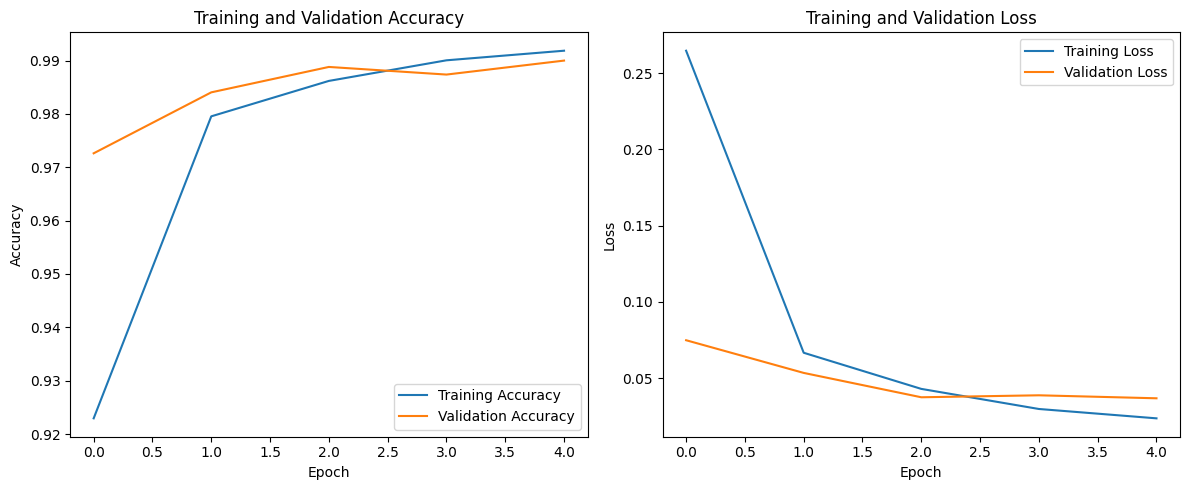

In [25]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # 1 row, 2 columns, plot 1
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2) # 1 row, 2 columns, plot 2
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### This is what an idal "good Fit" looks like 
1. Accuracy Plot : Both the training and validation accuracy are increasing and finishing very close together.
   > - The model is successfully learning from the training data (blue line goes up) and is also performing almost equally well on the new, unseen validation data (orange line goes up).
   > - It's normal for the training accuracy to be slightly higher than the validation accuracy at the end. This tiny gap indicates that the model has learned the training data slightly better than the new data, which is expected. The gap is very small, which means the model is generalizing well.

#### 2. Evaluate the Model on the Validation Set 

In [26]:
print("\nEvaluating model on the validation set...")
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

print(f"\nValidation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Evaluating model on the validation set...

Validation Loss: 0.0369
Validation Accuracy: 99.00%


#### Analysis of the final Scores
> - Validation Loss : 0.369 :
> > -  Indicating that on average, the model's predictions on the validation set were very close to the true labels.
> - Validation Accuracy: 99.00% :
> > - Our baseline model correctly identified 99 out of every 100 handwritten digits in the unseen validation set. 

### Final Evaluation And Prediction

#### 1. Making Prediction on competition_train.csv

In [30]:
predictions = model.predict(competition_test_images)

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


#### 2. Convert the output probabilities into final digit labels (0-9)

In [31]:
predicted_labels = np.argmax(predictions, axis=1)

#### 3. Creating The Submission DF

In [32]:
submission = pd.DataFrame({
    'ImageId': range(1, len(predicted_labels) + 1),
    'Label': predicted_labels
})

In [34]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


#### 4. Creating Submission File

In [35]:
submission.to_csv('submission.csv', index=False)